In [27]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
%matplotlib inline 
from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rcParams
from wordcloud import WordCloud
import nltk

import warnings
import pickle
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 1000)

In [28]:
# Load Data From Pickel
with open('df_data.pickle', 'rb') as file:
    df_data = pickle.load(file)

# Misc Functions

In [29]:
def ReviewSentimentSummary_Counts(df):
 #   '''Creates Two Summary Graphs, Uses Data Created in Exploratory Part of Notebook'''
    df_SentCounts = df['emotion_E'].value_counts()
    df_SentPercents = df['emotion_E'].value_counts(normalize=True)

    #     df_churnCounts = df_wD["Churn"].value_counts()
    #     df_churnpercents = df_wD["Churn"].value_counts(normalize=True)

    df_SentCounts = df_SentCounts.rename(index={0: 'Neg', 1:'Neut', 2:'Pos'})
    df_SentPercents = df_SentPercents.rename(index={0: 'Neg', 1:'Neut', 2:'Pos'})

    NegCnt = int(df_SentCounts.loc["Neg"])
    NeutCnt = int(df_SentCounts.loc["Neut"])
    PosCnt = int(df_SentCounts.loc["Pos"])

    Negpercent = round(df_SentPercents.loc["Neg"],2)
    Neutpercent = round(df_SentPercents.loc["Neut"],2)
    Pospercent = round(df_SentPercents.loc["Pos"],2)

    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    sns.set(font_scale=2)
    sns.set_style("whitegrid")
    sns.barplot(x =df_SentCounts.index, y = df_SentCounts, ax=ax[0], palette=['#CC8963','#5F9E6E', '#C00000']);
    ax[0].annotate('{:.0f}'.format(NegCnt), (2,500));
    ax[0].annotate('{:.0f}'.format(NeutCnt),(0,500));
    ax[0].annotate('{:.0f}'.format(PosCnt), (1,500));
    ax[0].axes.xaxis.set_visible(True)
    ax[0].set_ylabel("Count", size=15)

    for tick in ax[0].axes.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    for tick in ax[0].axes.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    sns.barplot(x =df_SentCounts.index, y = df_SentCounts, ax=ax[1], palette=['#CC8963','#5F9E6E', '#C00000']);
    ax[1].annotate('{:.0f}%'.format(100* Negpercent), (2,500));
    ax[1].annotate('{:.0f}%'.format(100* Neutpercent), (0,500));
    ax[1].annotate('{:.0f}%'.format(100* Pospercent), (1,500));
    ax[1].axes.xaxis.set_visible(True)
    ax[1].axes.yaxis.set_visible(False)
    ax[1].set_ylabel("Percent", size=15, color="black")
    for tick in ax[1].axes.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    for tick in ax[1].axes.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    plt.suptitle('Sentiment Counts', fontsize = 30)

    plt.tight_layout()
    plt.show();
    
def ReviewSentimentSummary_Counts1(df_data):
    df_SentCounts = df_data['emotion_E'].value_counts()
    df_SentPercents = df_data['emotion_E'].value_counts(normalize=True)

    df_SentCounts = df_SentCounts.rename(index={0: 'Neg', 1:'Neut', 2:'Pos'})
    df_SentPercents = df_SentPercents.rename(index={0: 'Neg', 1:'Neut', 2:'Pos'})

    NegCnt = int(df_SentCounts.loc["Neg"])
    NeutCnt = int(df_SentCounts.loc["Neut"])
    PosCnt = int(df_SentCounts.loc["Pos"])

    Negpercent = round(df_SentPercents.loc["Neg"],2)
    Neutpercent = round(df_SentPercents.loc["Neut"],2)
    Pospercent = round(df_SentPercents.loc["Pos"],2)

    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    sns.set(font_scale=2)
    sns.set_style("whitegrid")
    sns.barplot(x =df_SentCounts.index, y = df_SentCounts, ax=ax[0], palette=['#5F9E6E','#C00000','#CC8963']);
    ax[0].annotate('{:.0f}'.format(NegCnt), (1,500));
    ax[0].annotate('{:.0f}'.format(NeutCnt),(2,500));
    ax[0].annotate('{:.0f}'.format(PosCnt), (0,500));
    ax[0].axes.xaxis.set_visible(True)
    ax[0].set_ylabel("Count", size=15)

    for tick in ax[0].axes.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    for tick in ax[0].axes.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    sns.barplot(x =df_SentCounts.index, y = df_SentCounts, ax=ax[1], palette=['#5F9E6E','#C00000','#CC8963']);
    ax[1].annotate('{:.0f}%'.format(100* Negpercent), (1,500));
    ax[1].annotate('{:.0f}%'.format(100* Neutpercent), (2,500));
    ax[1].annotate('{:.0f}%'.format(100* Pospercent), (0,500));
    ax[1].axes.xaxis.set_visible(True)
    ax[1].axes.yaxis.set_visible(False)
    ax[1].set_ylabel("Percent", size=15, color="black")
    for tick in ax[1].axes.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    for tick in ax[1].axes.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)

    plt.suptitle('Sentiment Counts', fontsize = 30)

    plt.tight_layout()
    plt.show();

In [30]:
def reviewSentimentByBrand():
    # sns.set_style("whitegrid")
    # sns.barplot(x =df_SentByBrand.emotion_E, y = df_SentByBrand.count);


    fig, ax = plt.subplots(1, 1, figsize=(15, 4))
    # sns.set_theme(style="whitegrid")
    ax = sns.barplot(x="Brand", y="Count", hue="emotion_s", data=df_SentByBrand, palette=['#C00000','#CC8963','#5F9E6E'])
    # ax = sns.countplot(x="Brand", hue="emotion_s", data=df_SentByBrand, palette=['#C00000','#CC8963','#5F9E6E'])

    # sns.set(font_scale=2)

    # Negpercent = round(df_SentByBrand.loc["Neg"],2)
    # Neutpercent = round(df_SentByBrand.loc["Neut"],2)
    # Pospercent = round(df_SentByBrand.loc["Pos"],2)


    # ax[0].annotate('{:.0f}'.format(NegCnt), (1,500));
    # ax[0].annotate('{:.0f}'.format(NeutCnt),(2,500));
    # ax[0].annotate('{:.0f}'.format(PosCnt), (0,500));
    # ax[0].axes.xaxis.set_visible(True)
    # ax[0].set_ylabel("Count", size=15)

    # for tick in ax[0].axes.xaxis.get_major_ticks():
    #     tick.label.set_fontsize(20)

    # for tick in ax[0].axes.yaxis.get_major_ticks():
    #     tick.label.set_fontsize(20)

    total = df_SentByBrand['Count'].sum()
    for p in ax.patches:

        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() - .2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, 600), size=20, weight='bold')
    plt.xticks(fontsize =18)
    plt.yticks(fontsize =0)
    plt.fontsize =(35)
    plt.title('Sentiments By Brand',fontsize =30)

    plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='0') # for legend title
    # handles, labels = ax.get_legend_handles_labels()
    # ax.legend(handles=handles[1:], labels=labels[1:], title=" ")
    # ax.legend(handles=handles[1:], labels=labels[1:], title=" ")

    plt.xlabel (None)
    # plt.ylabel ('Count',fontsize =24)
    plt.ylabel (None)
    #     print(p.)
    ax.grid(False)
    plt.show()

def reviewSentimentByProd_Brand():
    # sns.set_style("whitegrid")
    # sns.barplot(x =df_SentByBrand.emotion_E, y = df_SentByBrand.count);


    fig, ax = plt.subplots(1, 1, figsize=(15, 4))
    # sns.set_theme(style="whitegrid")
    ax = sns.barplot(x="Prd_Brnd", y="Count", hue="emotion_s", data=df_SentsByPrd_Brnd, palette=['#C00000','#CC8963','#5F9E6E'])
    # ax = sns.countplot(x="Brand", hue="emotion_s", data=df_SentByBrand, palette=['#C00000','#CC8963','#5F9E6E'])

    # sns.set(font_scale=2)

    # Negpercent = round(df_SentByBrand.loc["Neg"],2)
    # Neutpercent = round(df_SentByBrand.loc["Neut"],2)
    # Pospercent = round(df_SentByBrand.loc["Pos"],2)


    # ax[0].annotate('{:.0f}'.format(NegCnt), (1,500));
    # ax[0].annotate('{:.0f}'.format(NeutCnt),(2,500));
    # ax[0].annotate('{:.0f}'.format(PosCnt), (0,500));
    # ax[0].axes.xaxis.set_visible(True)
    # ax[0].set_ylabel("Count", size=15)

    # for tick in ax[0].axes.xaxis.get_major_ticks():
    #     tick.label.set_fontsize(20)

    # for tick in ax[0].axes.yaxis.get_major_ticks():
    #     tick.label.set_fontsize(20)

    total = df_SentByBrand['Count'].sum()
    for p in ax.patches:

        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() - .2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, 100), size=15, weight='bold')
    plt.xticks(fontsize =14,rotation=45)

    # new_ax = ax.get_xticks() - 0.1
    # ax.set_xticks(new_ax)
    plt.xticks(plt.xticks()[0] - 0.1)

    plt.yticks(fontsize =0)
    plt.fontsize =(35)
    plt.title('Sentiments By Product/ Brand',fontsize =30)

    plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='0') # for legend title
    # handles, labels = ax.get_legend_handles_labels()
    # ax.legend(handles=handles[1:], labels=labels[1:], title=" ")
    # ax.legend(handles=handles[1:], labels=labels[1:], title=" ")

    plt.xlabel (None)
    # plt.ylabel ('Count',fontsize =24)
    plt.ylabel (None)
    #     print(p.)
    ax.grid(False)
    plt.show()

In [31]:
df_data.head(1)

tweets Prd_Brnd  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   iPhone   

            emotion  emotion_E       Labels_RNN  \
0  Negative emotion          0  [1.0, 0.0, 0.0]   

                                          tweets_RNN  \
0   I have 3G iPhone After 3 hrs tweeting at RISE...   

                                         tweets_tfid  Subjectivity  Polarity  \
0  3 g iphone 3 hrs tweet riseaustin dead need up...           0.4      -0.2   

   Brand emotion_s  
0  Apple       Neg

In [32]:
df_churnCounts = df_data['emotion'].value_counts()
df_churnpercents = df_data['emotion'].value_counts(normalize=True)

# Visuals

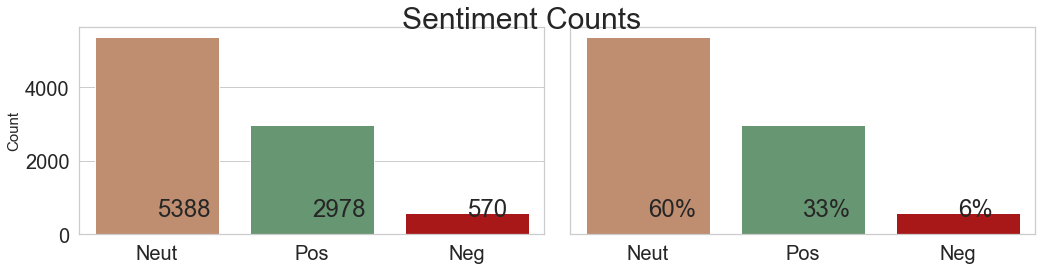

In [33]:
ReviewSentimentSummary_Counts(df_data)

In [34]:
productMentions = df_data.Prd_Brnd.value_counts().sum()
productMentionsNa =  df_data.Prd_Brnd.isnull().sum()

In [35]:
PercentProductMentions = productMentions/len(df_data)
print(f'Count of Rows with product Mentions: {productMentions}')
print(f'Precent Rows with Product Mentions: {round(PercentProductMentions,2)}')

Count of Rows with product Mentions: 3282
Precent Rows with Product Mentions: 0.37


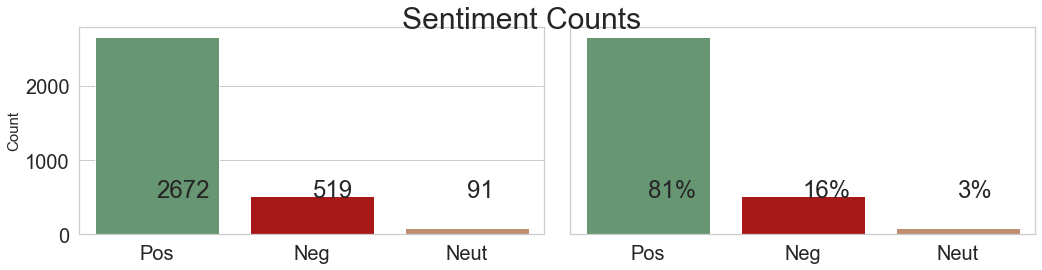

In [36]:
df_NoProds = df_data[~df_data["Prd_Brnd"].isnull()]
ReviewSentimentSummary_Counts1(df_NoProds)

In [68]:
df_SentsByPrd_Brnd = df_NoProds[["Prd_Brnd","emotion_E", 'emotion','emotion_s']].groupby(['Prd_Brnd', 'emotion_E', 'emotion_s'])[['emotion']].count()
df_SentsByPrd_Brnd = df_SentsByPrd_Brnd.stack().reset_index()
df_SentsByPrd_Brnd.drop(columns=["level_3"], inplace=True)
df_SentsByPrd_Brnd.columns=["Prd_Brnd","emotion_E","emotion_s","Count"]
##### Same result just in pivot
# df_SentsByProd1 = df_NoProds1.pivot_table(values=['emotion'], index=['Prd_Brnd'], columns=['emotion_E'], aggfunc='count').stack().reset_index()
# df_SentsByProd1.columns=["Prd_Brnd","emotion_E","Count"]


##### Same result just in pivot
df_SentByBrand = df_NoProds[["Brand","emotion_E", 'emotion','emotion_s']].pivot_table(values=['emotion'], index=['Brand'], columns=['emotion_s'], aggfunc='count').stack().reset_index()
df_SentByBrand.columns=["Brand","emotion_s","Count"]

In [69]:
df_SentByBrand

Brand emotion_s  Count
0  Android       Neg     16
1  Android      Neut      2
2  Android       Pos    141
3    Apple       Neg    388
4    Apple      Neut     65
5    Apple       Pos   1949
6   Google       Neg    115
7   Google      Neut     24
8   Google       Pos    582

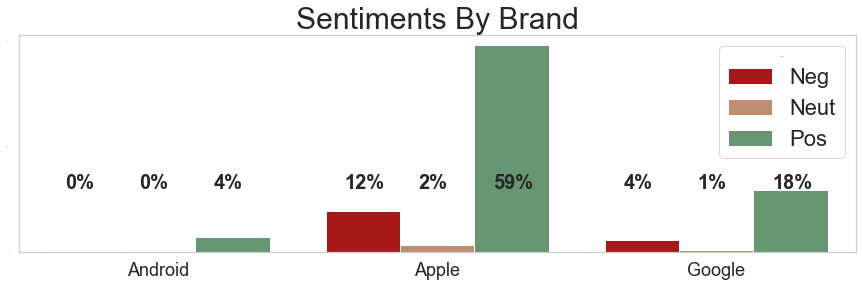

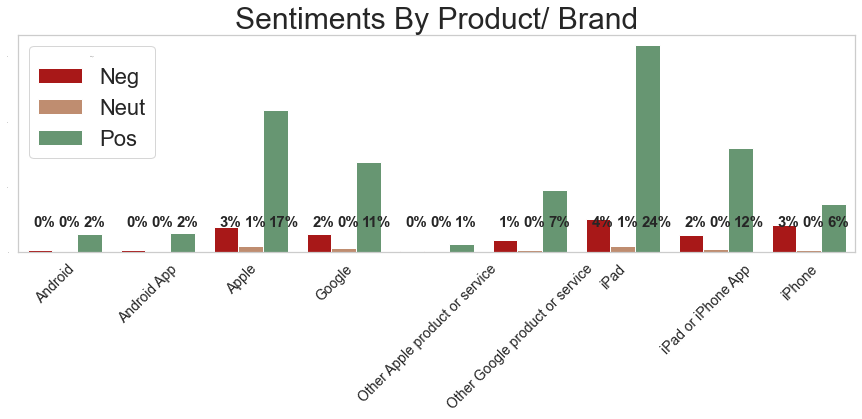

In [70]:
reviewSentimentByBrand()
reviewSentimentByProd_Brand()

In [38]:
# view positive and negative words
#Apple_______
wordcloud_Apple = df_NoProds[df_NoProds["Brand"]=="Apple"]

A_train_pos = wordcloud_Apple[wordcloud_Apple['emotion_E'] == 2]
A_train_pos_O = A_train_pos['tweets_RNN']

A_train_neg = wordcloud_Apple[wordcloud_Apple['emotion_E'] == 0]
A_train_neg_O = A_train_neg['tweets_RNN']

A_train_neut = wordcloud_Apple[wordcloud_Apple['emotion_E'] == 1]
A_train_neut_O = A_train_neut['tweets_RNN']

#Google_______
wordcloud_Goggle = df_NoProds[df_NoProds["Brand"]=="Google"]

G_train_pos = wordcloud_Goggle[wordcloud_Goggle['emotion_E'] == 2]
G_train_pos_O = G_train_pos['tweets_RNN']

G_train_neg = wordcloud_Goggle[wordcloud_Goggle['emotion_E'] == 0]
G_train_neg_O = G_train_neg['tweets_RNN']

G_train_neut = wordcloud_Goggle[wordcloud_Goggle['emotion_E'] == 1]
G_train_neut_O = G_train_neut['tweets_RNN']
    
# print("Positive words")
# wordcloud_draw(train_pos,'white')
# print("Negative words")
# wordcloud_draw(train_neg)
# print("Neutral words")
# wordcloud_draw(train_neut)

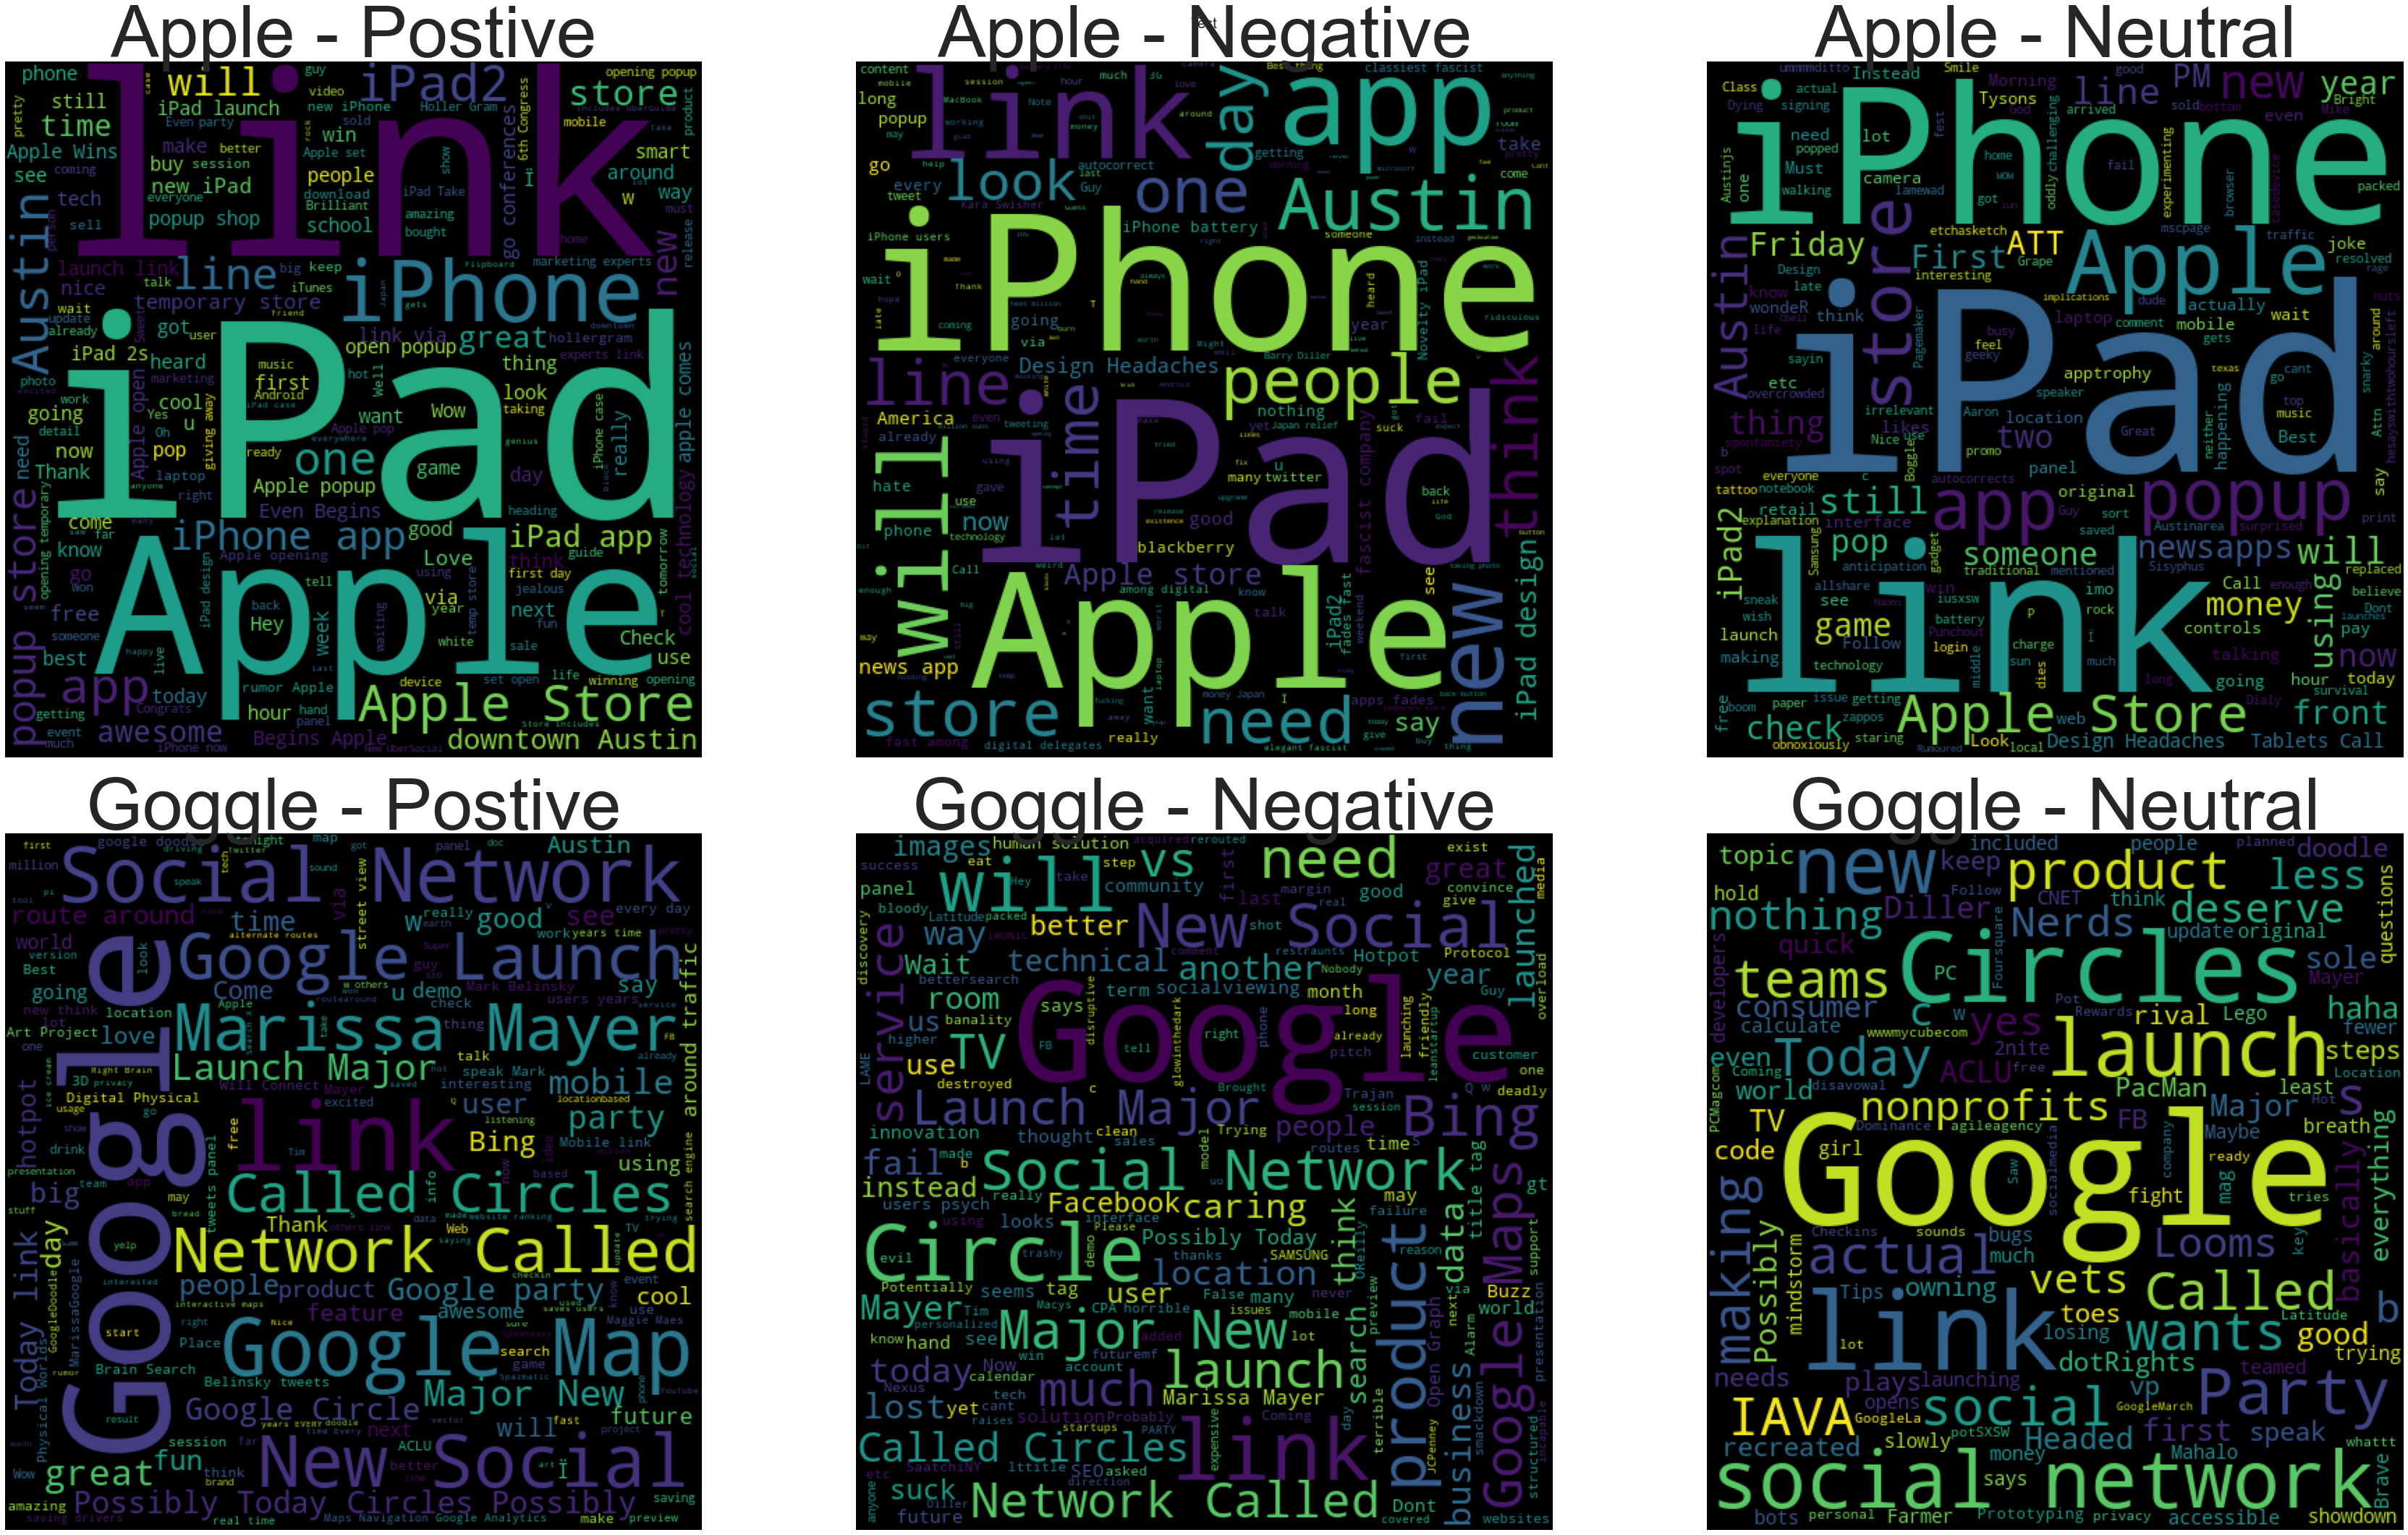

In [47]:
sents = []
A_train_pos = A_train_pos_O
A_train_pos = ' '.join(A_train_pos)
A_train_pos = " ".join([word for word in A_train_pos.split()])

A_train_neg = A_train_neg_O
A_train_neg = ' '.join(A_train_neg)
A_train_neg = " ".join([word for word in A_train_neg.split()])

A_train_neut = A_train_neut_O
A_train_neut = ' '.join(A_train_neut)
A_train_neut = " ".join([word for word in A_train_neut.split()])

G_train_pos = G_train_pos_O
G_train_pos = ' '.join(G_train_pos)
G_train_pos = " ".join([word for word in G_train_pos.split()])

G_train_neg = G_train_neg_O
G_train_neg = ' '.join(G_train_neg)
G_train_neg = " ".join([word for word in G_train_neg.split()])

G_train_neut = G_train_neut_O
G_train_neut = ' '.join(G_train_neut)
G_train_neut = " ".join([word for word in G_train_neut.split()])



sents.append(A_train_pos)
sents.append(A_train_neg)
sents.append(A_train_neut)

sents.append(G_train_pos)
sents.append(G_train_neg)
sents.append(G_train_neut)

topics = ["Apple - Postive", "Apple - Negative", "Apple - Neutral",
          "Goggle - Postive", "Goggle - Negative", "Goggle - Neutral"]

# top_words = cleaned_word
title = "Test"
n_components = 6
plt.figure(figsize=(50,30))
j = np.ceil(n_components/3)
for t in range(n_components):
    i=t+1
    plt.subplot(j, 3, i).set_title(topics[t], fontsize= 100)
    plt.plot()
    plt.imshow(WordCloud(width=500,height=500).generate(sents[t]))
    plt.axis("off")
plt.suptitle(title, size=20)
plt.tight_layout()
plt.show()

In [ ]:
def display_wordcloud(top_words, title, n_components):
    plt.figure()
    j = np.ceil(n_components/4)
    for t in range(n_components):
        i=t+1
        plt.subplot(j, 4, i).set_title("Topic #" + str(t))
        plt.plot()
        plt.imshow(WordCloud().fit_words(top_words[t]))
        plt.axis("off")
    fig.suptitle(title)
    plt.show()
    
# view positive and negative words
train_pos = wordcloud_Apple[wordcloud_Apple['emotion_E'] == '2']
train_pos = wordcloud_Apple['tweets_RNN']
train_neg = wordcloud_Apple[wordcloud_Apple['emotion_E'] == '0']
train_neg = wordcloud_Apple['tweets_RNN']
train_neut = wordcloud_Apple[wordcloud_Apple['emotion_E'] == '1']
train_neut = wordcloud_Apple['tweets_RNN']

    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)
print("Neutral words")
wordcloud_draw(train_neut)

In [ ]:
# Most frequent words appearing in entire corpus
freq = nltk.FreqDist(corpus_tokens)
freq.most_common(20)

In [ ]:
# Test function on corpus
corpus = ','.join(df['Review'])
corpus_tokens = preprocess_review(corpus, 
                                  pattern=pattern, 
                                  stopwords=stopword_list)
len(corpus_tokens)

In [ ]:
# Most frequent words appearing in entire corpus
freq = nltk.FreqDist(A_train_neut)
freq.most_common(500)

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Corpus Word Frequencies - 50", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Words", size = 20)
plt.ylabel("Count", size = 20)
freq.plot(50);

In [ ]:
# Split BEFORE processsing to avoid leaking
X = df['Review']
y = df['Rating']
# Plot frequency by class
NLP.plot_word_frequencies(df, n=20, pattern=pattern, stopwords=stopword_list)

In [ ]:
# Word cloud per class (removed noise)
NLP.plot_clouds_per_rating(df, pattern=pattern, stopwords=removed_words)

In [ ]:
#feature importance
importance = pd.Series(final.named_steps['clf'].coef_[0], 
                       index=final.named_steps["ttf-idf"].get_feature_names())
plt.figure(figsize=(15,10))
importance.sort_values().tail(30).plot(kind='barh', color='grey');
plt.title("Final Model Feature Importances - Top 30")
plt.xlabel('Importance')
plt.ylabel("Word / Token")
plt.show()

In [ ]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(
                      background_color=color,
                      width=2500,
                      height=1500
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
    
    
    
    

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(5, 5))
data = train_pos
color = 'black'
words = ' '.join(data)
cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(background_color=color,width=500,height=500).generate(cleaned_word)

# plt.figure(1,figsize=(5, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

    

In [ ]:
# Review counts of positive and negatice sentiments by brand
df_nuetral = df_data[df_data["emotion_E"]==1]
df_pos = df_data[df_data["emotion_E"]==2]
df_neg = df_data[df_data["emotion_E"]==0]

# print("df_neg")
# print(df_neg.Prd_Brnd.value_counts())
# print("\n")
# print("Neutral")
# print(df_nuetral.Prd_Brnd.value_counts())
# print("\n")
# print("Pos")
# print(df_pos.Prd_Brnd.value_counts())